In [180]:
#Housing Price Prediction using Linear Regression

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
data = pd.read_csv("housing_data.csv")

In [183]:
data

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Parking      1226 non-null   float64
 5   Price        1259 non-null   int64  
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1254 non-null   object 
 9   Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 98.5+ KB


In [185]:
data.dropna(inplace=True)

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 1 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   float64
 1   BHK          1005 non-null   int64  
 2   Bathroom     1005 non-null   float64
 3   Furnishing   1005 non-null   object 
 4   Parking      1005 non-null   float64
 5   Price        1005 non-null   int64  
 6   Status       1005 non-null   object 
 7   Transaction  1005 non-null   object 
 8   Type         1005 non-null   object 
 9   Per_Sqft     1005 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 86.4+ KB


In [187]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price'],axis=1)
y = data['Price']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [189]:
train_data = X_train.join(y_train)

In [190]:
train_data

,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft,Price
551,1800.0,4,4.0,Semi-Furnished,1.0,Ready_to_move,Resale,Builder_Floor,6944.0,12500000
987,1050.0,2,2.0,Semi-Furnished,1.0,Ready_to_move,Resale,Apartment,10000.0,10000000
266,2700.0,4,4.0,Semi-Furnished,2.0,Ready_to_move,New_Property,Builder_Floor,23529.0,52500000
664,2090.0,3,4.0,Semi-Furnished,2.0,Ready_to_move,Resale,Apartment,21052.0,44000000
831,500.0,1,2.0,Semi-Furnished,1.0,Ready_to_move,Resale,Apartment,4200.0,2100000
...,...,...,...,...,...,...,...,...,...,...
184,350.0,1,1.0,Semi-Furnished,1.0,Ready_to_move,New_Property,Apartment,5714.0,2000000
880,500.0,1,1.0,Unfurnished,39.0,Ready_to_move,Resale,Apartment,3600.0,1800000
1028,1912.0,3,3.0,Semi-Furnished,1.0,Almost_ready,New_Property,Apartment,14382.0,27500000
216,1350.0,3,2.0,Unfurnished,1.0,Ready_to_move,New_Property,Apartment,3800.0,5130000


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Per_Sqft'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

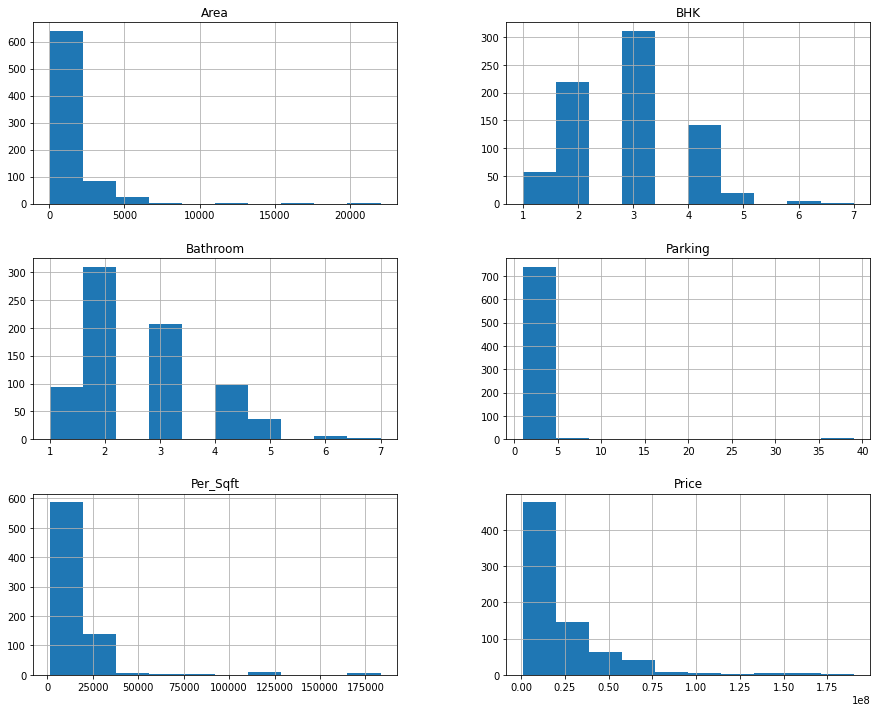

In [191]:
train_data.hist(figsize=(15,12))

In [192]:
#Pre-processing for correlation matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data_corr = train_data.copy()
train_data_corr['Furnishing'] = label_encoder.fit_transform(train_data_corr['Furnishing'])
train_data_corr['Status'] = label_encoder.fit_transform(train_data_corr['Status'])
train_data_corr['Transaction'] = label_encoder.fit_transform(train_data_corr['Transaction'])
train_data_corr['Type'] = label_encoder.fit_transform(train_data_corr['Type'])


In [193]:
train_data_corr.corr()

,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft,Price
Area,1.000000,0.481113,0.531251,0.019914,-0.009764,-0.246723,-0.123205,0.108400,0.196144,0.580276
BHK,0.481113,1.000000,0.804935,-0.096922,-0.110811,-0.161633,-0.160022,0.150082,0.183708,0.619589
Bathroom,0.531251,0.804935,1.000000,-0.018294,-0.051804,-0.180518,-0.192678,0.155959,0.243611,0.753961
Furnishing,0.019914,-0.096922,-0.018294,1.000000,0.102256,-0.054902,-0.026004,-0.027870,0.002828,0.047949
Parking,-0.009764,-0.110811,-0.051804,0.102256,1.000000,0.013089,0.002004,-0.072293,-0.011482,0.014965
Status,-0.246723,-0.161633,-0.180518,-0.054902,0.013089,1.000000,0.271618,0.057825,-0.027019,-0.260557
Transaction,-0.123205,-0.160022,-0.192678,-0.026004,0.002004,0.271618,1.000000,-0.190881,-0.047239,-0.197504
Type,0.108400,0.150082,0.155959,-0.027870,-0.072293,0.057825,-0.190881,1.000000,0.106588,0.118604
Per_Sqft,0.196144,0.183708,0.243611,0.002828,-0.011482,-0.027019,-0.047239,0.106588,1.000000,0.349082
Price,0.580276,0.619589,0.753961,0.047949,0.014965,-0.260557,-0.197504,0.118604,0.349082,1.000000


<Axes: >

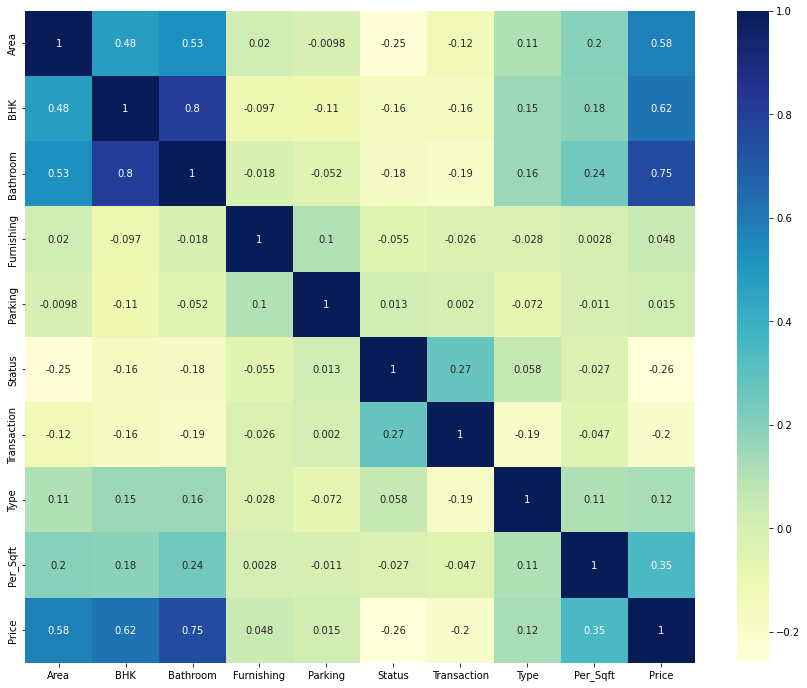

In [194]:
#to visualize correlation matrix

plt.figure(figsize=(15,12))
sns.heatmap(train_data_corr.corr(),annot=True,cmap="YlGnBu")


In [195]:
#Pre-processing
#Log-normal distribution

train_data['Area'] = np.log(train_data['Area']+1)
train_data['BHK'] = np.log(train_data['BHK']+1)
train_data['Bathroom'] = np.log(train_data['Bathroom']+1)
train_data['Parking'] = np.log(train_data['Parking']+1)
train_data['Per_Sqft'] = np.log(train_data['Per_Sqft']+1)
train_data['Price'] = np.log(train_data['Price']+1)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Per_Sqft'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

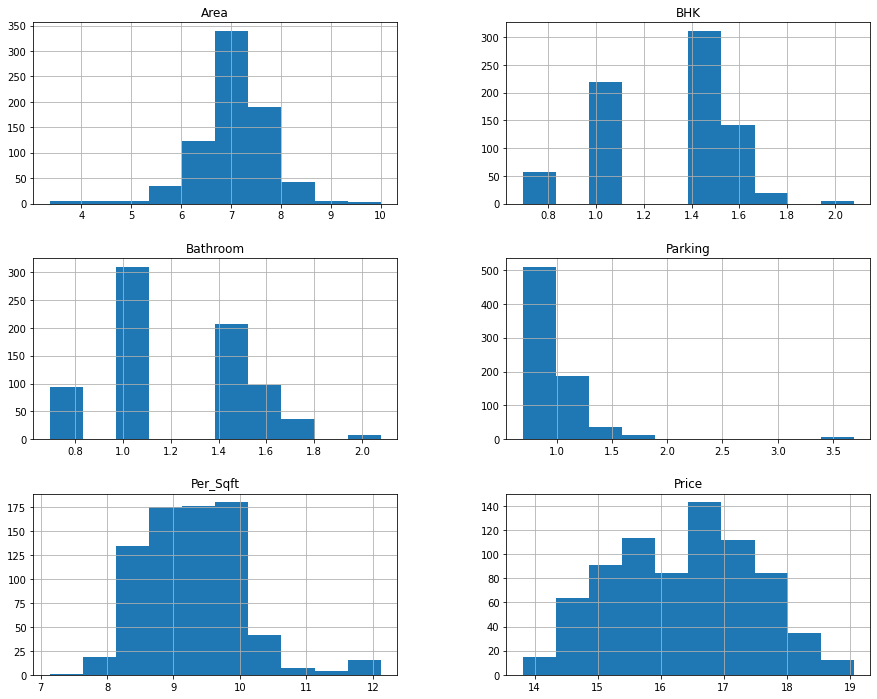

In [196]:
train_data.hist(figsize=(15,12))

In [197]:
train_data = train_data.join(pd.get_dummies(train_data.Furnishing,dtype='int')).drop(['Furnishing'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Status,dtype='int')).drop(['Status'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Transaction,dtype='int')).drop(['Transaction'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Type,dtype='int')).drop(['Type'],axis=1)

In [198]:
train_data

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished,Almost_ready,Ready_to_move,New_Property,Resale,Apartment,Builder_Floor
551,7.496097,1.609438,1.609438,0.693147,8.845777,16.341239,0,1,0,0,1,0,1,0,1
987,6.957497,1.098612,1.098612,0.693147,9.210440,16.118096,0,1,0,0,1,0,1,1,0
266,7.901377,1.609438,1.609438,1.098612,10.066031,17.776324,0,1,0,0,1,1,0,0,1
664,7.645398,1.386294,1.609438,1.098612,9.954798,17.599700,0,1,0,0,1,0,1,1,0
831,6.216606,0.693147,1.098612,0.693147,8.343078,14.557448,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,5.860786,0.693147,0.693147,0.693147,8.650850,14.508658,0,1,0,0,1,1,0,1,0
880,6.216606,0.693147,0.693147,3.688879,8.188967,14.403298,0,0,1,0,1,0,1,1,0
1028,7.556428,1.386294,1.386294,0.693147,9.573802,17.129697,0,1,0,1,0,1,0,1,0
216,7.208600,1.386294,1.098612,0.693147,8.243019,15.450616,0,0,1,0,1,1,0,1,0


<Axes: >

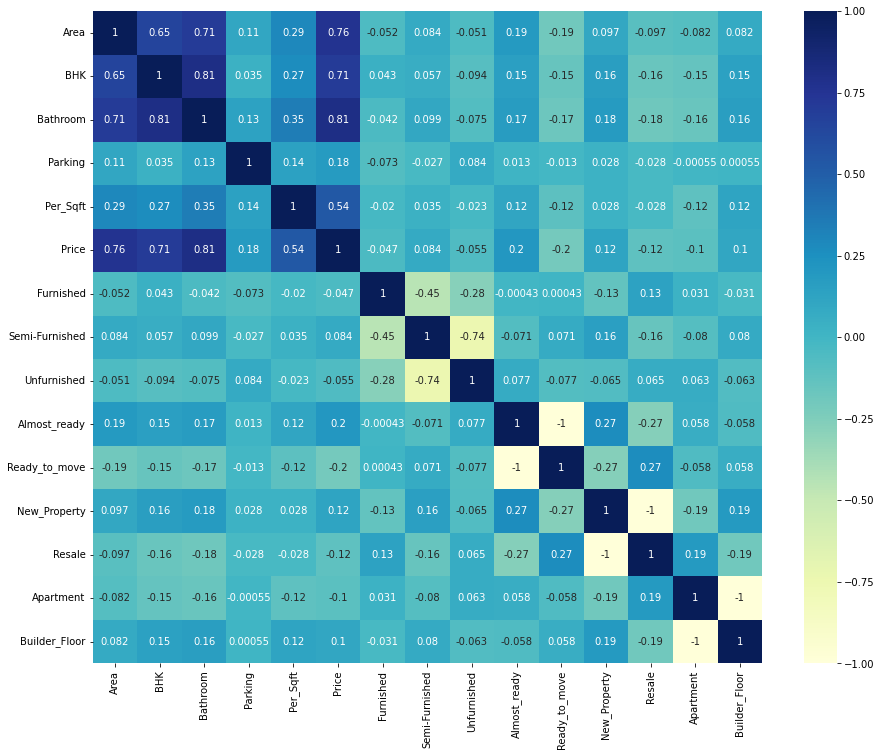

In [199]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [200]:
train_data.Price

551     16.341239
987     16.118096
266     17.776324
664     17.599700
831     14.557448
          ...    
184     14.508658
880     14.403298
1028    17.129697
216     15.450616
358     15.319588
Name: Price, Length: 753, dtype: float64

In [201]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['Price'],axis=1), train_data['Price']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [202]:
test_data = X_test.join(y_test)

test_data['Area'] = np.log(test_data['Area']+1)
test_data['BHK'] = np.log(test_data['BHK']+1)
test_data['Bathroom'] = np.log(test_data['Bathroom']+1)
test_data['Parking'] = np.log(test_data['Parking']+1)
test_data['Per_Sqft'] = np.log(test_data['Per_Sqft']+1)
test_data['Price'] = np.log(test_data['Price']+1)

test_data = test_data.join(pd.get_dummies(test_data.Furnishing,dtype='int')).drop(['Furnishing'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.Status,dtype='int')).drop(['Status'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.Transaction,dtype='int')).drop(['Transaction'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.Type,dtype='int')).drop(['Type'],axis=1)

In [203]:
X_test, y_test = test_data.drop(['Price'],axis=1), test_data['Price']

In [204]:
test_data

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished,Almost_ready,Ready_to_move,New_Property,Resale,Apartment,Builder_Floor
503,7.003974,1.098612,1.098612,0.693147,10.327349,16.523561,0,1,0,0,1,0,1,1,0
718,7.244942,1.386294,1.386294,0.693147,9.353488,16.759950,0,1,0,0,1,0,1,1,0
1014,7.139660,1.386294,1.098612,0.693147,8.622814,15.761421,0,1,0,0,1,0,1,0,1
264,7.244942,1.386294,1.386294,1.098612,10.066031,17.727534,0,1,0,0,1,1,0,0,1
497,7.035269,1.386294,1.386294,1.098612,10.008883,17.034386,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,7.286876,1.386294,1.386294,0.693147,9.175335,16.618871,0,1,0,0,1,0,1,1,0
947,5.860786,0.693147,0.693147,0.693147,9.392745,15.250595,0,0,1,0,1,0,1,1,0
818,7.170888,1.386294,1.386294,1.098612,8.100161,15.761421,0,1,0,0,1,1,0,0,1
910,6.311735,1.098612,1.098612,1.098612,9.608378,16.185754,0,1,0,0,1,0,1,0,1


In [205]:
reg.score(X_test,y_test)

0.8271405389971274